In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# # # Novartis Data Science Competition

Novartis Data Science Competition

# 1. To Predict if the server will be hacked or not

# Load the data from Github

In [5]:
import numpy as np
import pandas as pd
df_Test_url = 'https://raw.githubusercontent.com/blessondensil294/Novartis-Data-Science-Competition/master/Data/Test.csv'
df_Train_url = 'https://raw.githubusercontent.com/blessondensil294/Novartis-Data-Science-Competition/master/Data/Train.csv'
df_Train = pd.read_csv(df_Train_url)
df_Test = pd.read_csv(df_Test_url)

## Exploratory Data Analysis

In [6]:
df_Train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [7]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [8]:
df.Train.describe()

NameError: name 'df' is not defined

In [ ]:
df_Train.shape

In [ ]:
df_Test.shape

In [ ]:
df_Train.isnull().sum()

In [ ]:
df_Test.insull().sum()

In [ ]:
df_Train.columns

In [ ]:
df_Train['MULTIPLE_OFFENSE'].value_counts()

In [ ]:
df_Train.shape

In [ ]:
df_Train = df_Train.drop(['INCIDENT_ID', 'DATE'], axis=1)

In [ ]:
df_Train.drop_duplicates(keep='first', inplace=True)

In [ ]:
df_Train.shape

In [9]:
df_Train['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [10]:
df_Train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [11]:
df_Train['X_12'] = df_Train['X_12'].ffill()
df_Test['X_12'] = df_Test['X_12'].ffill()
df_Train['X_12'] = df_Train['X_12'].bfill()
df_Test['X_12'] = df_Test['X_12'].bfill()

In [12]:
df_Train.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [13]:
df_Train.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [15]:
#Convert to integer
df_Train['X_12'] = df_Train['X_12'].astype(int)
df_Test['X_12'] = df_Test['X_12'].astype(int)

In [16]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23856 non-null int64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: int64(16), object(2)
memory usage: 3.3+ MB


# Feature Selection

# Correlation of Data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

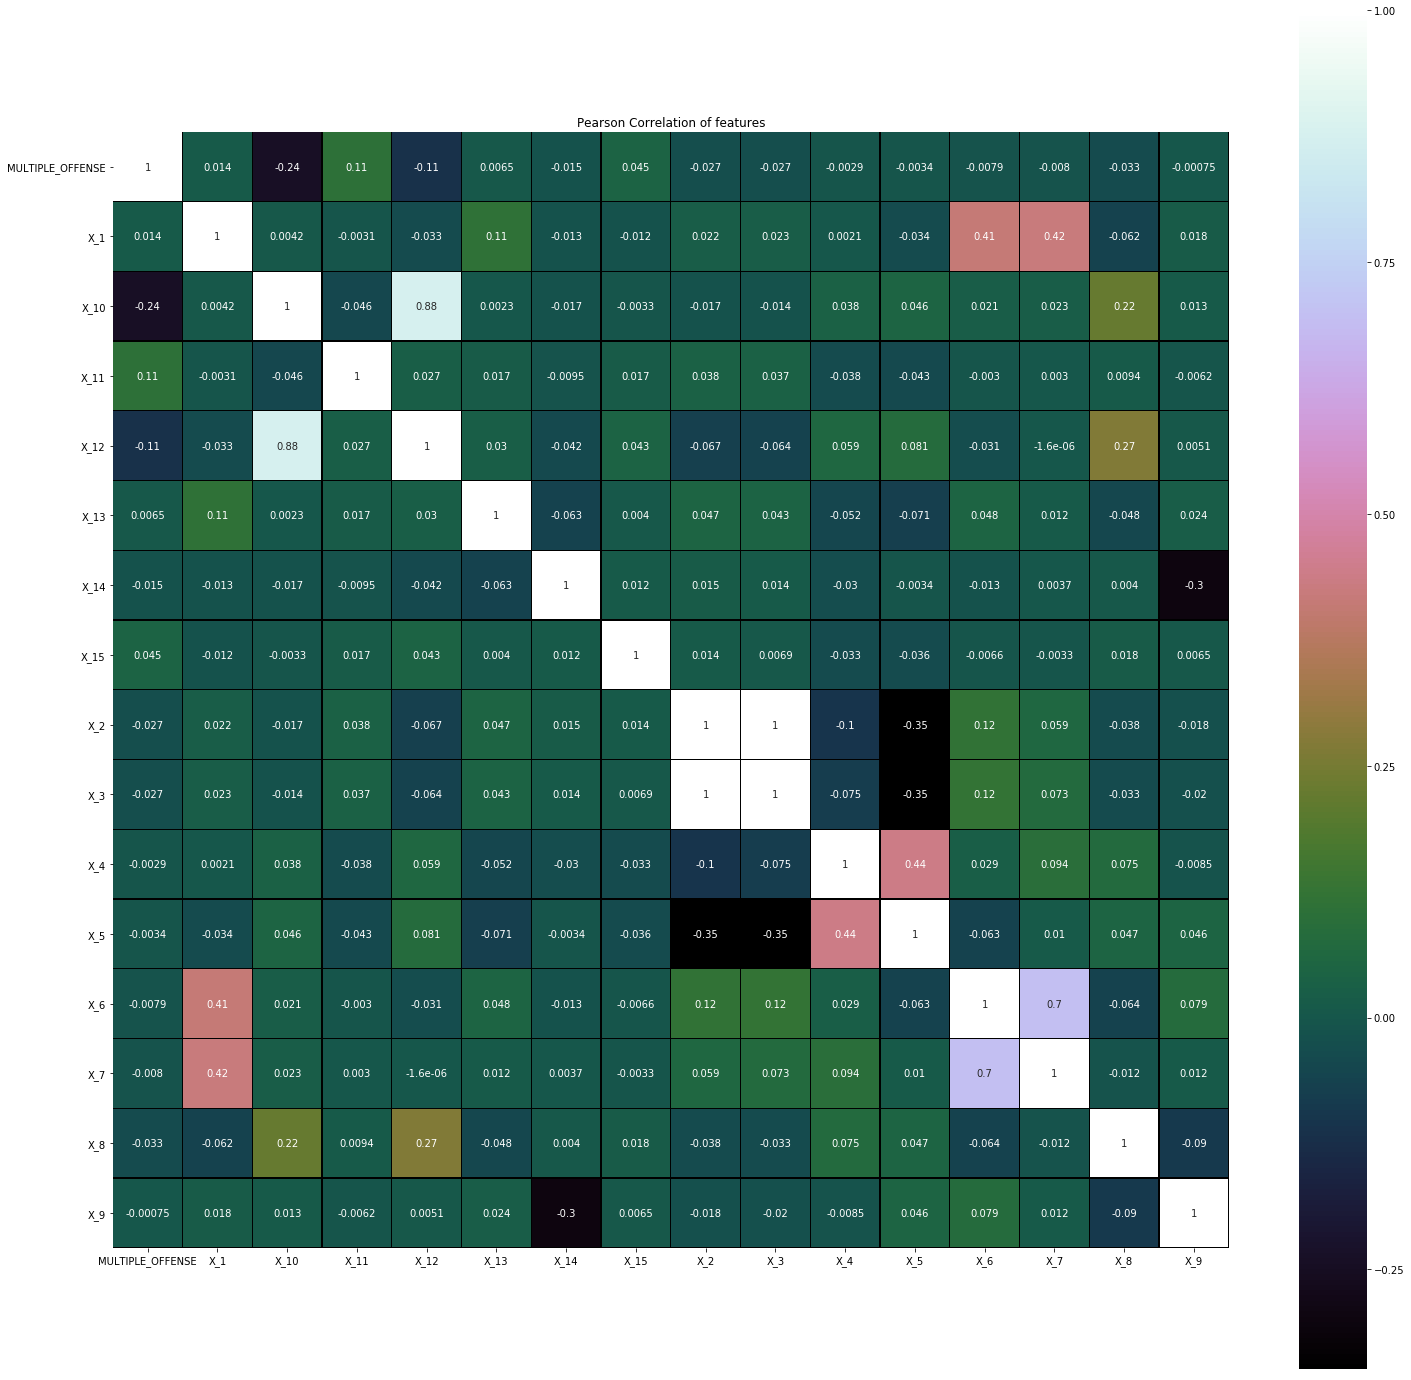

In [18]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df_Train.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df_Train.columns.difference(str_list) 
# Create Dataframe containing only numerical features
train_num = df_Train[num_list]
f, ax = plt.subplots(figsize=(25, 25))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(train_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [19]:
df_Train.corr()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
X_1,1.000000,0.021999,0.022603,0.002137,-0.034220,0.409876,0.421454,-0.061897,0.017984,0.004155,-0.003078,-0.033035,0.111611,-0.012708,-0.012132,0.014034
X_2,0.021999,1.000000,0.996985,-0.104321,-0.349190,0.119718,0.058806,-0.038174,-0.017749,-0.016710,0.038003,-0.067241,0.046668,0.015194,0.013822,-0.027293
X_3,0.022603,0.996985,1.000000,-0.075344,-0.347519,0.124662,0.072954,-0.033035,-0.019853,-0.014485,0.036946,-0.064382,0.043201,0.013522,0.006851,-0.027218
X_4,0.002137,-0.104321,-0.075344,1.000000,0.439616,0.028929,0.094076,0.075197,-0.008453,0.038077,-0.037614,0.058821,-0.051861,-0.030024,-0.033198,-0.002921
X_5,-0.034220,-0.349190,-0.347519,0.439616,1.000000,-0.062784,0.010161,0.046926,0.046428,0.046212,-0.043111,0.081404,-0.071233,-0.003413,-0.036383,-0.003450
X_6,0.409876,0.119718,0.124662,0.028929,-0.062784,1.000000,0.695243,-0.063541,0.079192,0.021186,-0.002990,-0.030526,0.047845,-0.013155,-0.006621,-0.007903
X_7,0.421454,0.058806,0.072954,0.094076,0.010161,0.695243,1.000000,-0.011824,0.011519,0.023205,0.002970,-0.000002,0.012204,0.003738,-0.003277,-0.008036
X_8,-0.061897,-0.038174,-0.033035,0.075197,0.046926,-0.063541,-0.011824,1.000000,-0.090184,0.222004,0.009424,0.272171,-0.048140,0.003987,0.017636,-0.033397
X_9,0.017984,-0.017749,-0.019853,-0.008453,0.046428,0.079192,0.011519,-0.090184,1.000000,0.013388,-0.006152,0.005066,0.023537,-0.297295,0.006475,-0.000748
X_10,0.004155,-0.016710,-0.014485,0.038077,0.046212,0.021186,0.023205,0.222004,0.013388,1.000000,-0.045596,0.875633,0.002332,-0.016519,-0.003336,-0.242596


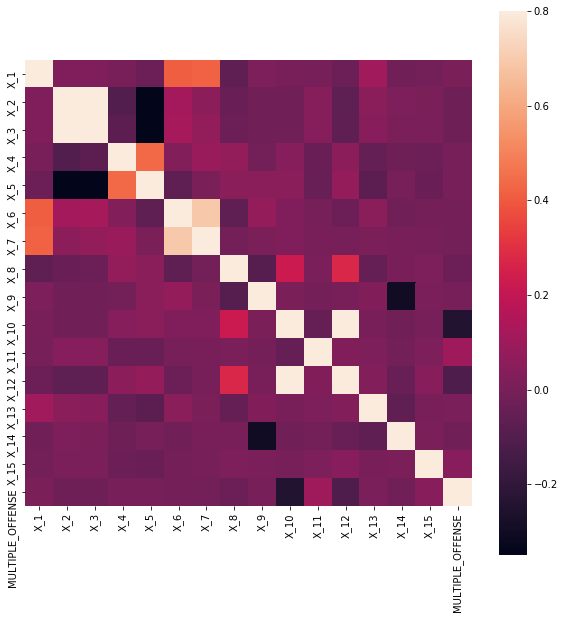

In [20]:
corrmat = df_Train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, vmax=.8)

# Multi Colinearity of the Data

In [21]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
df_multi = df_Train
df_multi = df_multi.drop('MULTIPLE_OFFENSE', axis=1)

In [24]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_multi.values, i) for i in range(df_multi.shape[1])]
vif["features"] = df_multi.columns

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [25]:
vif.round(1)

""


# Data Modeling Prediction

# split the Data to x variable and y variable

In [26]:
x = df_Train
x = x.drop(['MULTIPLE_OFFENSE'], axis=1)
y = df_Train['MULTIPLE_OFFENSE']
x_pred = df_Test
x_pred = x_pred.drop(['INCIDENT_ID', 'DATE'], axis=1)

# Balancing the Train Data using SMOTE Overbalancing

In [28]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=294,sampling_strategy='not majority')
x_sm, y_sm = sm.fit_resample(x,y)
x_sm = pd.DataFrame(x_sm)
x_sm.columns = x.columns

ModuleNotFoundError: No module named 'imblearn'

# ## Random Forest Model Classification

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1, random_state=294)

In [30]:
rf.fit(x_sm,np.ravel(y_sm))

NameError: name 'x_sm' is not defined

In [31]:
y_pred = rf.predict(x_pred)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [32]:
submission_df = pd.DataFrame({'INCIDENT_ID':df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':y_pred})
submission_df.to_csv('Sample Submission RF v1.csv', index=False)

NameError: name 'y_pred' is not defined

### CatBoost Classification

In [33]:
pip install catboost

    5% |█▊                              | 614kB 4.4kB/s eta 0:40:21Exception:
Traceback (most recent call last):
  File "/Users/yous/anaconda3/lib/python3.7/site-packages/pip/_vendor/urllib3/contrib/pyopenssl.py", line 294, in recv_into
    return self.connection.recv_into(*args, **kwargs)
  File "/Users/yous/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1822, in recv_into
    self._raise_ssl_error(self._ssl, result)
  File "/Users/yous/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1622, in _raise_ssl_error
    raise WantReadError()
OpenSSL.SSL.WantReadError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/yous/anaconda3/lib/python3.7/site-packages/pip/_vendor/urllib3/response.py", line 360, in _error_catcher
    yield
  File "/Users/yous/anaconda3/lib/python3.7/site-packages/pip/_vendor/urllib3/response.py", line 442, in read
    data = self._fp.read(amt)
  File "/Users/yous/anaconda3/li

In [34]:
from catboost import CatboostClassifier
cb_cl = CatBoostClassifier(learning_rate=0.15, n_estimators=500, subsample=0.70, max_depth=5, scale_pos_weight=2.5)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
cb_cl.fit(x_sm,np.ravel(y_sm))

In [36]:
y_pred = cb_cl.predict(x_pred)

NameError: name 'cb_cl' is not defined

In [37]:
submission_df = pd.DataFrame({'INCIDENT_ID':df_Test['INCIDENT_ID'], 'MULTIPLE_OFFENSE':y_pred})
submission_df.to_csv('Sample Submission CB v1.csv', index=False)

NameError: name 'y_pred' is not defined